In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(columns=['CustomerID','Genre','Age'],inplace = True)
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X = df.iloc[:,:2].values

**Elbow curve

find the optimal numbers of clusters

In [7]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[269981.28, 186687.04312531714, 106348.37306211119, 99255.72567688867, 44448.45544793371, 37558.92202302528, 30259.65720728547, 31500.304192104195, 22143.222100767453, 24026.16812185562]


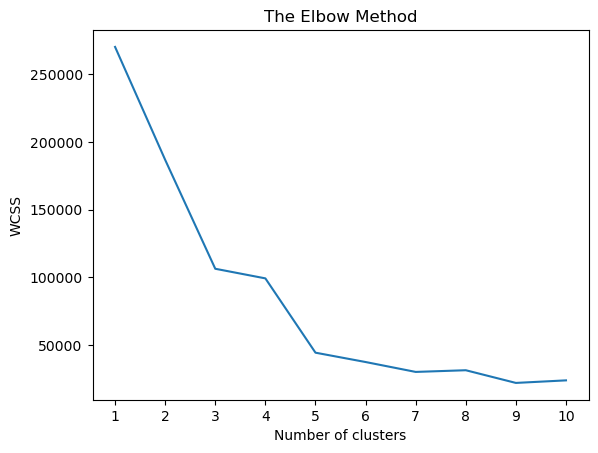

In [10]:
plt. plot(range (1, 11), wcss)
plt. xticks(range (1, 11))
plt. title('The Elbow Method')
plt. xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#Modeling
means = KMeans(n_clusters = 5,init = 'k-means++')


In [12]:
1 # predict

y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([8, 4, 3, 4, 8, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 8, 4, 8, 4, 8, 4,
       3, 4, 3, 4, 8, 4, 8, 4, 3, 4, 3, 4, 3, 4, 3, 4, 8, 4, 8, 4, 8, 0,
       8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 6, 2, 6, 2, 1, 2, 1, 2,
       6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 7, 2, 7, 2, 7, 2, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5])

In [16]:
df['Cluster'] = pd.DataFrame(y_kmeans)
df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,8
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,8
...,...,...,...
195,120,79,5
196,126,28,7
197,126,74,5
198,137,18,7


**Visualising the clusters

In [ ]:
#Before Clustering

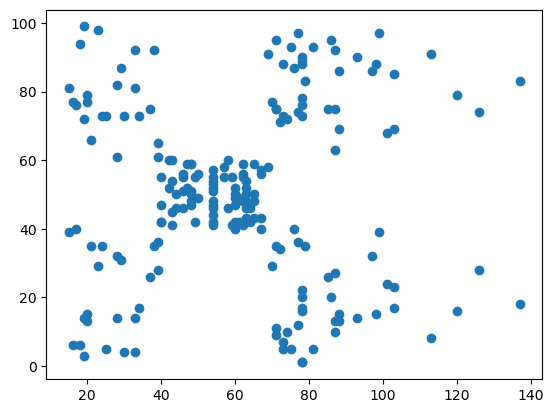

In [17]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()

In [ ]:
#After Clustering

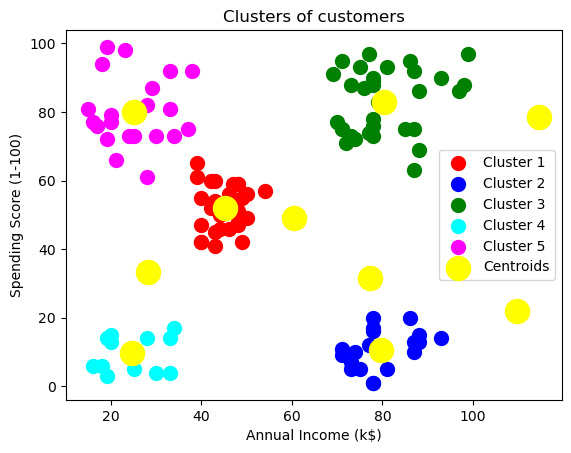

In [18]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],
            s= 100, c ='red',label ='Cluster 1')

plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],
            s= 100, c ='blue',label ='Cluster 2')


plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],
            s= 100, c ='green',label ='Cluster 3')


plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],
            s= 100, c ='cyan',label ='Cluster 4')

plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],
            s= 100, c ='magenta',label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s= 300, c = 'yellow',label ='Centroids')

plt. title( 'Clusters of customers') 
plt. xlabel('Annual Income (k$)')
plt.ylabel( 'Spending Score (1-100)')
plt. legend ()
plt.show()

In [ ]:
**

**CLUSTERING-OBSERVATIONS


*a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alers which would lead to increase in the revenue collected by the mall as they are loyal customers.
b. Hign Income, Low spending score (cruster 3) - target inese customers oy asking the reedback and adversing the product in a better way to conven them mio Clustercustomers
c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.
d. Low Income. High Spendina Score (Cluster 1) - May or may not taraet these aroun of customers based on the policy of the mall.
e. Low Income, Low soenaina score Cluster 4- Dont larde! ese customers since wey nave less income and need to save money.